In [56]:
from mne import Epochs, find_events, set_eeg_reference
from time import time, strftime, gmtime
from collections import OrderedDict
from glob import glob
from collections import OrderedDict
from mne import create_info, concatenate_raws
from mne.io import RawArray
from mne.channels import read_montage
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'app','utils','jupyter'))
import utils
%matplotlib

Using matplotlib backend: Qt5Agg


In [61]:
files = ['C:/Users/jdpig/BrainWaves Workspaces/Dano Nelson Faces Houses/data/Test/EEG/Test-1-raw.csv']
sfreq=128
ch_ind = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
stim_ind = 14
replace_ch_names = None
newRaw = utils.load_csv_as_raw(files, sfreq, ch_ind, stim_ind, replace_ch_names)

['C:/Users/jdpig/BrainWaves Workspaces/Dano Nelson Faces Houses/data/Test/EEG/Test-1-raw.csv']
Creating RawArray with float64 data, n_channels=15, n_times=2425
    Range : 0 ... 2424 =      0.000 ...    18.938 secs
Ready.


In [22]:
files = ['C:/Users/jdpig/BrainWaves Data/N170/Yorg_1.csv']
sfreq=128
ch_ind = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
stim_ind = 14
replace_ch_names = None
oldRaw = utils.load_csv_as_raw(files, sfreq, ch_ind, stim_ind, replace_ch_names)

['C:/Users/jdpig/BrainWaves Data/N170/Yorg_1.csv']
Creating RawArray with float64 data, n_channels=15, n_times=18191
    Range : 0 ... 18190 =      0.000 ...   142.109 secs
Ready.


In [62]:
find_events(newRaw)

14 events found
Event IDs: [1 2]


array([[ 418,    0,    2],
       [ 570,    0,    2],
       [ 712,    0,    2],
       [ 856,    0,    2],
       [1018,    0,    1],
       [1166,    0,    2],
       [1331,    0,    1],
       [1496,    0,    2],
       [1653,    0,    1],
       [1806,    0,    2],
       [1950,    0,    2],
       [2112,    0,    1],
       [2262,    0,    2],
       [2412,    0,    2]], dtype=int64)

In [63]:
## Filtering Data

# Input
low_cutoff = 1
high_cutoff = 30

# Computation
raw.filter(low_cutoff, high_cutoff, method='iir');

Setting up band-pass filter from 1 - 30 Hz


C:\Users\jdpig\Miniconda3\envs\brainwaves2\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


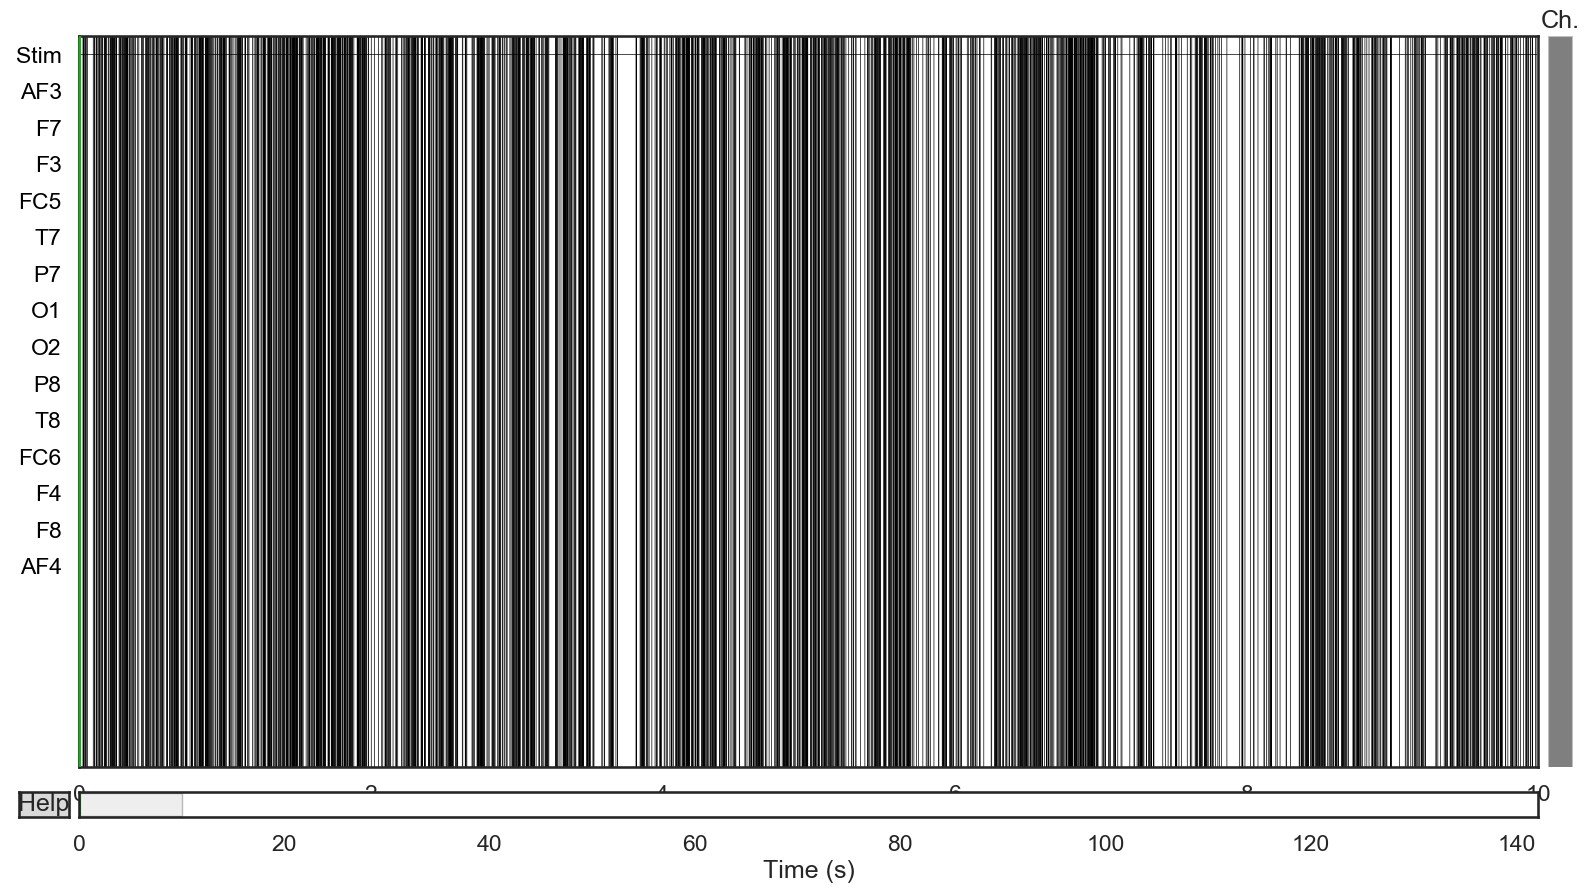

In [16]:
raw.plot()

In [64]:
## Epoch Data

# Input
event_id = {'House': 1, 'Face': 2}
tmin=-0.1
tmax=0.8
baseline = (tmin, tmax)
picks = None
reject = None

# Computation
events = find_events(newRaw)
# TODO: Figure out how to normalize and auto-reject Emotiv EEG data
epochs = Epochs(raw, events=events, event_id=event_id, 
                tmin=tmin, tmax=tmax, baseline=baseline, reject=reject, preload=True, 
                verbose=False, picks=picks)

# Output
{"totalEpochs": len(epochs.events), "dropPercentage": (1 - len(epochs.events)/len(events)) * 100, **{x: len(epochs[x]) for x in event_id}}

14 events found
Event IDs: [1 2]


{'Face': 10, 'House': 4, 'dropPercentage': 0.0, 'totalEpochs': 14}

In [66]:
epochs.save('C:/Users/jdpig/BrainWaves Workspaces/Dano Nelson Faces Houses/data/Test/EEG/Test_1-epo.fif')

In [21]:
%matplotlib
clean_epochs_plot = epochs.plot(scalings='auto');
fig = plt.gcf()
fig.canvas.manager.window.activateWindow()
fig.canvas.manager.window.raise_()

Channels marked as bad: []
Using matplotlib backend: Qt5Agg


AttributeError: Unknown property ymargin

Channels marked as bad: []


In [ ]:
## Plot ERPs

# Input
ch_ind = 10

# Computation
conditions = OrderedDict({key: [value] for (key, value) in event_id.items()})

# Output
X, y = utils.plot_conditions(epochs, ch_ind=ch_ind, conditions=conditions, 
                                ci=97.5, n_boot=1000, title='',)

In [ ]:
{'House': 3, 'Face': 4}.items()